<a href="https://colab.research.google.com/github/sruthi2397/project/blob/master/nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing files**

In [0]:
import numpy as np
import pandas as pd
import nltk
nltk.download('all')
import re
import os
import codecs
from sklearn import feature_extraction


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

**Authenticating Google Drive**

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 17.0MB/s 


In [0]:
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title merged22dec.csv, id 1UYPj3FoVjXfTCw0hCzoKsZT3Uqa-eH_5
title ivrdec22.csv, id 1aBOrGCtpC2a-akqgI6iraTuh7buEpeAz
title ivrdec10.csv, id 1uhAlOwk_8Vt8D1s8Af7ysWr0yZIu6nBP
title cdr22dec.csv, id 14bwGLDL3Hg10pJJkSJI60nZ5DLCIKRnh
title cdr10dec.csv, id 1Fl67LxmC9ImHEjFX2x3bRrvv-qwuWUht
title clusfinal.csv, id 1aMefQVRSQ7BTeX91ls3bUyJl5XmsbIOB


In [0]:
file_id='1UYPj3FoVjXfTCw0hCzoKsZT3Uqa-eH_5'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('merged.csv')

In [0]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [0]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems
 



In [0]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

**Loading Data**

In [0]:
import pandas as pd
data=pd.read_csv('merged.csv')
data.describe()
data.head(25)

,object,ucid,calling_party,handle_time,hour,ivr_duration,screen_pop,ivr_path,Unnamed: 8,ivr_lang
0,0,1.000070e+19,8.282810e+09,0,10,219,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
1,1,1.000070e+19,3.235145e+09,109,10,220,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,NoInput Langua...",NaN,eng
2,2,1.000200e+19,2.138842e+09,95,10,206,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
3,3,1.000140e+19,3.232377e+09,78,11,211,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
4,4,1.000140e+19,9.284099e+09,175,14,221,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
5,5,1.000140e+19,6.789074e+09,165,18,92,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
6,6,1.000140e+19,8.632130e+09,260,18,132,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
7,7,1.000000e+19,4.787318e+09,194,18,273,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
8,8,1.000140e+19,3.343327e+09,239,18,122,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng
9,9,1.000140e+19,9.842774e+09,390,18,125,"{""language"": ""eng"", ""reason"": ""transfer to age...","Welcome,Fire Break,Introduction,CardEntry,Card...",NaN,eng


**Stopwords**

In [0]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
stop_words = set(stopwords.words('english')) ##Selecting the stop words we want
stop_words.update(['.',',','welcome','fire','break','introduction','transfer','agent'])

In [0]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
synopses=data['ivr_path']
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [0]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')
print(vocab_frame.head(20))

there are 94455 items in vocab_frame
                   words
welcom           welcome
fire                fire
break              break
introduct   introduction
cardentri      cardentry
cardentri      cardentry
star                star
key                  key
first              first
digit              digit
cardentri      cardentry
nocard            nocard
loststolen    loststolen
nocard            nocard
rout               route
to                    to
agent              agent
nocard            nocard
lost                lost
stolen            stolen


**Count Vectorizer**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
countvec1 = CountVectorizer()
word_count_vector=countvec1.fit_transform(data['ivr_path'])
dtm_v1 = pd.DataFrame(word_count_vector.toarray(),columns=countvec1.get_feature_names(), index=None)
countvec = CountVectorizer(min_df= 5,stop_words=stop_words)
dtm = pd.DataFrame(countvec.fit_transform(data['ivr_path']).toarray(), columns=countvec.get_feature_names(), index=None)
print(dtm)


      account  acct  activation  alert  api  applicable  atm  authentication  \
0           0     0           0      0    0           0    0               0   
1           0     0           0      0    0           0    0               0   
2           0     0           0      0    0           0    0               0   
3           0     0           0      0    0           0    0               0   
4           0     0           0      0    0           0    0               0   
5           0     0           0      0    0           0    0               0   
6           0     0           0      0    0           0    0               0   
7           1     2           0      0    0           1    0               0   
8           0     0           0      0    0           0    0               0   
9           1     4           0      0    0           0    0               0   
10          3     0           0      0    0           0    0               0   
11          1     4           0      0  

**Term-frequency Inverse document frequency vectorizer**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words=stop_words,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'introduct', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'welcom', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 3.09 s, sys: 0 ns, total: 3.09 s
Wall time: 3.09 s
(2483, 85)


In [0]:
terms = tfidf_vectorizer.get_feature_names()
terms

['account',
 'balanc',
 'balanc check',
 'balanc check main',
 'balanc hear',
 'balanc hear balanc',
 'bm',
 'bm new',
 'bm new custcar',
 'cardauth',
 'cardauth valid',
 'cardauth valid cardentri',
 'cardentri cardauth',
 'cardentri cardauth valid',
 'cardentri cardentri',
 'cardentri cardentri cardauth',
 'cardentri cardentri star',
 'cardentri dobentri',
 'cardentri dobentri valid',
 'cardentri nocard',
 'cardentri star',
 'cardentri star key',
 'ch',
 'ch main',
 'ch main menu',
 'ch menu',
 'ch menu select',
 'check',
 'check main',
 'check main menu',
 'checkal',
 'checkal fals',
 'checkal fals bm',
 'custcar',
 'digit',
 'digit cardentri',
 'digit cardentri nocard',
 'dobentri',
 'dobentri ssnentri',
 'dobentri ssnentri valid',
 'dobentri valid',
 'dobentri valid dobentri',
 'fals',
 'fals bm',
 'fals bm new',
 'first',
 'first digit',
 'first digit cardentri',
 'hear',
 'hear balanc',
 'hear balanc check',
 'introduct cardentri cardentri',
 'key',
 'key first',
 'key first digi

**cosine similarity**

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

**K-means clustering**

In [0]:
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters,init='k-means++',random_state=1)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()


CPU times: user 3.56 s, sys: 20.5 ms, total: 3.58 s
Wall time: 3.58 s


In [0]:
from sklearn.externals import joblib
joblib.dump(km, 'doc_cluster.pkl')

['doc_cluster.pkl']

In [0]:

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [0]:
calling_party=list(data.loc[:,'calling_party'])
ivr_duration=list(data.loc[:,'ivr_duration'])
handle_time=list(data.loc[:,'handle_time'])
ivr_path=list(data.loc[:,'ivr_path'])
#print(ivr_duration)
ivr = {'calling_party':[],'ivr_duration':[],'handle_time':[],'clusters':clusters,'ivr_path':[]}
ivr['calling_party']=calling_party
ivr['ivr_duration']=ivr_duration
ivr['handle_time']=handle_time
ivr['ivr_path']=ivr_path
#print(ivr['clusters'])
frame = pd.DataFrame(ivr, index = [clusters] , columns = ['calling_party', 'ivr_duration', 'handle_time', 'clusters','ivr_path'])
print(frame.head(10))
frame.to_csv("frame.csv")

   calling_party  ivr_duration  handle_time  clusters  \
1   8.282810e+09           219            0         1   
1   3.235145e+09           220          109         1   
1   2.138842e+09           206           95         1   
1   3.232377e+09           211           78         1   
1   9.284099e+09           221          175         1   
1   6.789074e+09            92          165         1   
2   8.632130e+09           132          260         2   
1   4.787318e+09           273          194         1   
2   3.343327e+09           122          239         2   
1   9.842774e+09           125          390         1   

                                            ivr_path  
1  Welcome,Fire Break,Introduction,CardEntry,Card...  
1  Welcome,Fire Break,Introduction,NoInput Langua...  
1  Welcome,Fire Break,Introduction,CardEntry,Card...  
1  Welcome,Fire Break,Introduction,CardEntry,Card...  
1  Welcome,Fire Break,Introduction,CardEntry,Card...  
1  Welcome,Fire Break,Introduction,CardEnt

In [0]:

frame['clusters'].value_counts() 

2    870
1    549
3    538
0    526
Name: clusters, dtype: int64

In [0]:
grouped = frame['handle_time'].groupby(frame['clusters']) #groupby cluster for aggregation purposes

grouped.mean() 

clusters
0    361.209125
1    394.969035
2    343.394253
3    276.392193
Name: handle_time, dtype: float64

In [0]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['ivr_path'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'non', b'non', b'ch', b'selection', b'menu', b'ch',

Cluster 0 titles: Welcome,Fire Break,Introduction,CardEntry,Invalid Account Check,Invalid Account Check,Invalid Account Check,Non CH Main Menu,Invalid Non CH Menu Selection,Invalid Non CH Menu Selection,NoInput Non CH Menu Selection,Transfer To Agent,CheckAll is False,Transfer to BM CustCare NonCard,, Welcome,Fire Break,Introduction,CardEntry,Non CH Main Menu,Refund Inquiry Non CH Menu Selection,Invalid Non CH Refund Self Service,Invalid Non CH Refund Self Service,NoMatch Non CH Refund Self Service,Invalid Non CH Refund Self Service,Transfer To Agent,CheckAll is False,Transfer to BM CustCare NonCard,, Welcome,Fire Break,Introduction,CardEntry,Non CH Main Menu,Refund Inquiry Non CH Menu Selection,Invalid Non CH Refund Self Service,Invalid Non CH Refund Self Service,Invalid Non CH Refund Self Service,Transfer To Agent,CheckAll is False,Transfer to BM CustCare NonCard,, Welcome,Fire Break,Introd

# Multi dimensional scaling

In [0]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

**visualizing document clusters**

In [0]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'non-ch,menu,selection', 
                 1: 'nocard, noinput, firstdigit', 
                 2: 'balance, ssnentry, dobentry', 
                 3:'cardauth, cardentry, valid'}

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


KeyError: ignored

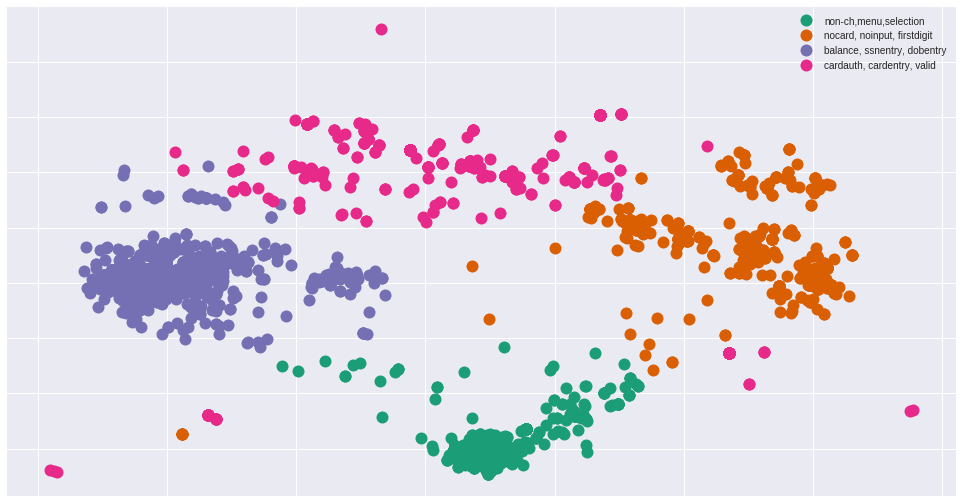

In [0]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png', dpi=200)

In [0]:
!pip install mpld3


    100% |████████████████████████████████| 798kB 22.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
Successfully built mpld3


In [0]:
import mpld3
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [0]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=ivr_path)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [0]:
frame=pd.read_csv('frame.csv')


In [0]:
frame.loc[frame.clusters==1, 'tag'] = 'about_Balance Enquiry'
frame.loc[frame.clusters==2, 'tag'] = 'about_Invalid Card/Account'
frame.loc[frame.clusters==3, 'tag'] = 'about_Card Authentication'
frame.loc[frame.clusters==0, 'tag'] = 'about_Non CH Menu Selection ' 


In [0]:
print(frame.head(15))


   Unnamed: 0  calling_party  ivr_duration  handle_time  clusters  \
0      ('1',)   8.282810e+09           219            0         1   
1      ('1',)   3.235145e+09           220          109         1   
2      ('1',)   2.138842e+09           206           95         1   
3      ('1',)   3.232377e+09           211           78         1   
4      ('1',)   9.284099e+09           221          175         1   
5      ('1',)   6.789074e+09            92          165         1   
6      ('2',)   8.632130e+09           132          260         2   
7      ('1',)   4.787318e+09           273          194         1   
8      ('2',)   3.343327e+09           122          239         2   
9      ('1',)   9.842774e+09           125          390         1   
10     ('0',)   7.183162e+09           119          234         0   
11     ('1',)   2.543390e+09           292          373         1   
12     ('2',)   6.319917e+09            98          441         2   
13     ('3',)   4.058633e+09      

In [0]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [0]:
X = frame.ivr_path
y = frame.tag
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()), ])
nb.fit(X_train, y_train)
my_tags=['about_Balance Enquiry','about_Invalid Card/Account','about_Card Authentication','about_Non CH Menu Selection'] 
%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
p=pd.read_excel("ivrtest.xlsx")
pickle.dump(nb, open('model.pkl','wb'))
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.15 µs
accuracy 0.9838969404186796
                             precision    recall  f1-score   support

      about_Balance Enquiry       0.99      0.98      0.98       123
 about_Invalid Card/Account       0.98      0.97      0.98       129
  about_Card Authentication       0.97      1.00      0.98       218
about_Non CH Menu Selection       1.00      0.98      0.99       151

                  micro avg       0.98      0.98      0.98       621
                  macro avg       0.99      0.98      0.98       621
               weighted avg       0.98      0.98      0.98       621



In [0]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 7.39 µs
accuracy 0.9726247987117552
                             precision    recall  f1-score   support

      about_Balance Enquiry       0.92      0.99      0.95       123
 about_Invalid Card/Account       1.00      0.88      0.93       129
  about_Card Authentication       0.97      1.00      0.99       218
about_Non CH Menu Selection       1.00      1.00      1.00       151

                  micro avg       0.97      0.97      0.97       621
                  macro avg       0.97      0.97      0.97       621
               weighted avg       0.97      0.97      0.97       621



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [0]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs
accuracy 0.9951690821256038
                             precision    recall  f1-score   support

      about_Balance Enquiry       0.98      1.00      0.99       123
 about_Invalid Card/Account       1.00      0.98      0.99       129
  about_Card Authentication       1.00      1.00      1.00       218
about_Non CH Menu Selection       1.00      1.00      1.00       151

                  micro avg       1.00      1.00      1.00       621
                  macro avg       0.99      0.99      0.99       621
               weighted avg       1.00      1.00      1.00       621



In [0]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(frame) * .7)
train_posts =frame['ivr_path'][:train_size]
train_tags = frame['tag'][:train_size]

test_posts = frame['ivr_path'][train_size:]
test_tags = frame['tag'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_posts) # only fit on train

x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 2

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 1564 samples, validate on 174 samples
Epoch 1/2
1564/1564 [==============================] - 1s 601us/step - loss: 0.4383 - acc: 0.8836 - val_loss: 0.1122 - val_acc: 0.9943
Epoch 2/2
1564/1564 [==============================] - 1s 400us/step - loss: 0.0912 - acc: 0.9738 - val_loss: 0.0674 - val_acc: 0.9943


In [0]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

745/745 [==============================] - 0s 60us/step
Test accuracy: 0.9677852348993289
